In [3]:
import pandas as pd
import numpy as np

In [7]:
class hidden_layer_neuron:
    def __init__(self, X):
        # X is the input data
        self.X = X
        # y is the output data
        self.y = None
        # w is the weights with the bias
        self.w = np.zeros(1 + X.shape[1])
        # input size
        self.input_size = X.shape[1]

    def input_values(self, X):
        # set the input values for the output layer neurons
        self.X = X

    def forward_pass(self, X):
        # dot product of the input and the weights
        self.y = np.dot(X, self.w[1:]) + self.w[0]
        return self.y
    
    def forward_pass_with_ReLU_activation(self):
        # ReLU activation function
        return max(0, self.forward_pass(self.X))
    
class input_layer_neuron:
    def __init__(self, X_value):
        # X is the input data
        self.X = X_value

    def input_values(self, X):
        # set the input values for the input layer neurons
        self.X = X

    def forward_pass(self, X):
        # input value
        return X
    
class output_layer_neuron:
    def __init__(self, X, y):
        # X is the input data
        self.X = X
        # y is the output data
        self.y = None
        # w is the weights with the bias
        self.w = np.zeros(1 + X.shape[1])
        # input size
        self.input_size = X.shape[1]

    def input_values(self, X):
        # set the input values for the output layer neurons
        self.X = X

    def forward_pass(self, X):
        # dot product of the input and the weights
        self.y =  np.dot(X, self.w[1:]) + self.w[0]
        return self.y
    
    def forward_pass_with_SoftMax_activation(self, list_output_layer_values):
        # SoftMax activation function
        return np.exp(self.forward_pass(self.X)) / np.sum(np.exp(list_output_layer_values))
    
class input_layer:
    def __init__(self, number_of_neurons):
        # number of neurons in the input layer
        self.number_of_neurons = number_of_neurons
        # list of neurons in the input layer
        self.list_of_neurons = []
        # populate the list of input layer neurons
        for i in range(number_of_neurons):
            self.list_of_neurons.append(input_layer_neuron(0))
    def input_values(self, X):
        # set the input values for the input layer neurons
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].input_values(X[i])

    def forward_pass(self):
        # forward pass of the input layer
        return [self.list_of_neurons[i].forward_pass(self.list_of_neurons[i].X) for i in range(self.number_of_neurons)]
    
class hidden_layer:
    def __init__(self, number_of_neurons, input_layer):
        # number of neurons in the hidden layer
        self.number_of_neurons = number_of_neurons
        # list of neurons in the hidden layer
        self.list_of_neurons = []
        # populate the list of hidden layer neurons
        for i in range(number_of_neurons):
            self.list_of_neurons.append(hidden_layer_neuron(input_layer.forward_pass(), 0))
    def input_values(self, X):
        # set the input values for the hidden layer neurons
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].input_values(X)

    def forward_pass(self):
        # forward pass of the hidden layer
        return [self.list_of_neurons[i].forward_pass_with_ReLU_activation() for i in range(self.number_of_neurons)]

        

In [43]:
class input_layer_neuron:
    def __init__(self):
        # X is the input data
        self.X = None

    def input_values(self, X):
        # set the input values for the input layer neurons
        self.X = X

    def forward_pass(self, X):
        # input value
        return X

class hidden_layer_neuron:
    def __init__(self, input_size):
        self.X = None
        self.y = None
        self.w = np.zeros(1 + input_size)
        self.delta = None

    def input_values(self, X):
        self.X = [1] + X

    def forward_pass(self, X):
        self.y = np.dot(X, self.w)
        return self.y
    
    def forward_pass_with_ReLU_activation(self):
        return max(0, self.forward_pass(self.X))
    
    def compute_delta(self, downstream_deltas, downstream_weights):
    # Gradient of ReLU is 1 if y > 0, else it's 0
        if self.y > 0:
            self.delta = np.dot(downstream_deltas, downstream_weights)
        else:
            self.delta = 0
        return self.delta

class output_layer_neuron:
    def __init__(self, input_size):
        self.X = None
        self.y = None
        self.output = None
        self.w = np.zeros(1 + input_size)
        self.delta = None

    def input_values(self, X):
        self.X = X

    def forward_pass(self, X):
        self.y = np.dot(X, self.w[1:]) + self.w[0]
        return self.y
    
    def forward_pass_with_SoftMax_activation(self, list_output_layer_values):
        self.output = np.exp(self.forward_pass(self.X)) / np.sum(np.exp(list_output_layer_values))
        return self.output
    
    def compute_delta(self, target):
        
        # Delta for SoftMax with cross-entropy loss
        self.delta = self.output - target
        return self.delta
    
class input_layer:
    def __init__(self, number_of_neurons):
        # number of neurons in the input layer
        self.number_of_neurons = number_of_neurons
        # list of neurons in the input layer
        self.list_of_neurons = []
        # populate the list of input layer neurons
        for i in range(number_of_neurons):
            self.list_of_neurons.append(input_layer_neuron())
    def input_values(self, X):
        # set the input values for the input layer neurons
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].input_values(X[i])

    def forward_pass(self):
        # forward pass of the input layer
        return [self.list_of_neurons[i].forward_pass(self.list_of_neurons[i].X) for i in range(self.number_of_neurons)]

class hidden_layer:
    def __init__(self, number_of_neurons, input_layer):
        self.number_of_neurons = number_of_neurons
        input_layer.downstream_layer = self
        self.list_of_neurons = []
        self.downstream_layer = None
        for i in range(number_of_neurons):
            self.list_of_neurons.append(hidden_layer_neuron(input_layer.number_of_neurons))
    
    def input_values(self, X):
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].input_values(X)

    def forward_pass(self):
        return [self.list_of_neurons[i].forward_pass_with_ReLU_activation() for i in range(self.number_of_neurons)]
    
    def compute_deltas(self):
        downstream_deltas = [neuron.delta for neuron in self.downstream_layer.list_of_neurons]
        downstream_weights = [neuron.w for neuron in self.downstream_layer.list_of_neurons]
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].compute_delta(downstream_deltas, downstream_weights)

class output_layer:
    def __init__(self, number_of_neurons, hidden_layer):
        self.number_of_neurons = number_of_neurons
        hidden_layer.downstream_layer = self
        self.list_of_neurons = []
        for i in range(number_of_neurons):
            self.list_of_neurons.append(output_layer_neuron(hidden_layer.number_of_neurons))
    
    def input_values(self, X):
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].input_values(X)

    def forward_pass(self):
        values = [self.list_of_neurons[i].forward_pass(self.list_of_neurons[i].X) for i in range(self.number_of_neurons)]
        return [self.list_of_neurons[i].forward_pass_with_SoftMax_activation(values) for i in range(self.number_of_neurons)]
    
    def compute_deltas(self, targets):
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].compute_delta(targets[i])

class NeuralNetwork:
    def __init__(self, input_size, hidden_layer_neuron_counts, output_size):
        self.input_layer = input_layer(input_size)
        self.hidden_layers = []
        
        for x in range (len(hidden_layer_neuron_counts)):
            if x == 0:
                self.hidden_layers.append(hidden_layer(hidden_layer_neuron_counts[x], self.input_layer))
            else:
                self.hidden_layers.append(hidden_layer(hidden_layer_neuron_counts[x], self.hidden_layers[x-1]))
        
        self.output_layer = output_layer(output_size, self.hidden_layers[-1])
    
    def feed_forward(self, X):
        self.input_layer.input_values(X)
        previous_layer = self.input_layer
        for layer in self.hidden_layers:
            layer.input_values(previous_layer.forward_pass())
            previous_layer = layer
        self.output_layer.input_values(previous_layer.forward_pass())
        return self.output_layer.forward_pass()
    
    def backward_pass(self, output_vector, target_vector):
        self.output_layer.compute_deltas(target_vector)
        previous_layer = self.output_layer
        



        # output = self.forward_pass(X)
        # self.output_layer.compute_deltas(y)
        # self.hidden_layer.compute_deltas(self.output_layer)

    
    def update_weights(self, learning_rate):
        for neuron in self.hidden_layer.list_of_neurons:
            neuron.w[1:] -= learning_rate * neuron.delta * neuron.X
            neuron.w[0] -= learning_rate * neuron.delta
        for neuron in self.output_layer.list_of_neurons:
            neuron.w[1:] -= learning_rate * neuron.delta * neuron.X
            neuron.w[0] -= learning_rate * neuron.delta
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(X)):
                self.backward_pass(X[i], y[i])
                self.update_weights(learning_rate)

# Sample input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Sample target output (for XOR problem)
y = np.array([[0], [1], [1], [0]])

# Create a neural network with 2 input neurons, 2 hidden neurons, and 1 output neuron
nn = NeuralNetwork(input_size=2, hidden_layer_neuron_counts=[2], output_size=4)

a = nn.feed_forward(X[0])

print(a)



# # Train the neural network
# nn.train(X, y, epochs=10000, learning_rate=0.1)

# # Test the neural network
# for x in X:
#     print(f"Input: {x}, Predicted Output: {nn.forward_pass(x)}")

# # Display the updated weights after training
# print("Updated weights of hidden layer neurons:")
# for i, neuron in enumerate(nn.hidden_layer.list_of_neurons):
#     print(f"Neuron {i+1}: {neuron.w}")

# print("Updated weights of output layer neurons:")
# for i, neuron in enumerate(nn.output_layer.list_of_neurons):
#     print(f"Neuron {i+1}: {neuron.w}")

[0.25, 0.25, 0.25, 0.25]


In [53]:
import csv

def read(folder_name):
    list =[]
    with open(folder_name, 'r') as f:
        reader = csv.reader(f)
        for row in reader: 
            list.append(row)
    f.close()
    return list

def write_to_csv(filename, data):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

def write_db_to_csv(derivatives):
    db_data = [derivatives['db' + str(i + 1)] for i in range(L)]
    write_to_csv('db.csv', db_data)

def writeDWToCsv(derivatives):
    for i in range(L):
        file = open(r'dw.csv', 'a+', newline ='') 
        with file: 
            write = csv.writer(file) 
            array = derivatives['dW' + str(i+1)] 
            write.writerows(array) 

In [51]:
import numpy as np

class input_layer_neuron:
    def __init__(self):
        self.X = None

    def input_values(self, X):
        self.X = X

    def forward_pass(self):
        return self.X

class hidden_layer_neuron:
    def __init__(self, input_size):
        self.X = None
        self.y = None
        self.w = np.random.randn(1 + input_size)  # Initialize weights randomly
        self.delta = None

    def input_values(self, X):
        self.X = np.concatenate(([1], X))  # Add bias term (X0 = 1)

    def forward_pass(self):
        self.y = np.dot(self.X, self.w)
        return self.y

    def forward_pass_with_ReLU_activation(self):
        self.y = max(0, self.forward_pass())
        return self.y
    
    def compute_delta(self, downstream_deltas, downstream_weights):
        if self.y > 0:  # ReLU derivative
            self.delta = np.dot(downstream_deltas, downstream_weights)
        else:
            self.delta = 0
        return self.delta

class output_layer_neuron:
    def __init__(self, input_size):
        self.X = None
        self.y = None
        self.output = None
        self.w = np.random.randn(1 + input_size)  # Initialize weights randomly
        self.delta = None

    def input_values(self, X):
        self.X = np.concatenate(([1], X))  # Add bias term (X0 = 1)

    def forward_pass(self):
        self.y = np.dot(self.X, self.w)
        return self.y
    
    def forward_pass_with_SoftMax_activation(self, list_output_layer_values):
        exp_values = np.exp(self.y)
        softmax_output = exp_values / np.sum(np.exp(list_output_layer_values))
        self.output = softmax_output
        return self.output
    
    def compute_delta(self, target):
        self.delta = self.output - target  # SoftMax with cross-entropy loss
        return self.delta

class input_layer:
    def __init__(self, number_of_neurons):
        self.number_of_neurons = number_of_neurons
        self.list_of_neurons = [input_layer_neuron() for _ in range(number_of_neurons)]

    def input_values(self, X):
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].input_values(X[i])

    def forward_pass(self):
        return [self.list_of_neurons[i].forward_pass() for i in range(self.number_of_neurons)]

class hidden_layer:
    def __init__(self, number_of_neurons, input_layer):
        self.number_of_neurons = number_of_neurons
        self.list_of_neurons = [hidden_layer_neuron(input_layer.number_of_neurons) for _ in range(number_of_neurons)]
        self.downstream_layer = None

    def input_values(self, X):
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].input_values(X)

    def forward_pass(self):
        return [self.list_of_neurons[i].forward_pass_with_ReLU_activation() for i in range(self.number_of_neurons)]
    
    def compute_deltas(self):
        downstream_deltas = np.array([neuron.delta for neuron in self.downstream_layer.list_of_neurons])
        downstream_weights = np.array([neuron.w[1:] for neuron in self.downstream_layer.list_of_neurons])
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].compute_delta(downstream_deltas, downstream_weights[:, i])

class output_layer:
    def __init__(self, number_of_neurons, hidden_layer):
        self.number_of_neurons = number_of_neurons
        self.list_of_neurons = [output_layer_neuron(hidden_layer.number_of_neurons) for _ in range(number_of_neurons)]
        hidden_layer.downstream_layer = self

    def input_values(self, X):
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].input_values(X)

    def forward_pass(self):
        values = [self.list_of_neurons[i].forward_pass() for i in range(self.number_of_neurons)]
        return [self.list_of_neurons[i].forward_pass_with_SoftMax_activation(values) for i in range(self.number_of_neurons)]
    
    def compute_deltas(self, targets):
        for i in range(self.number_of_neurons):
            self.list_of_neurons[i].compute_delta(targets[i])

class NeuralNetwork:
    def __init__(self, input_size, hidden_layer_neuron_counts, output_size):
        self.input_layer = input_layer(input_size)
        self.hidden_layers = [hidden_layer(hidden_layer_neuron_counts[0], self.input_layer)]
        
        for x in range(1, len(hidden_layer_neuron_counts)):
            self.hidden_layers.append(hidden_layer(hidden_layer_neuron_counts[x], self.hidden_layers[x-1]))
        
        self.output_layer = output_layer(output_size, self.hidden_layers[-1])

    def initialize_weights(self):
        for layer in self.hidden_layers:
            for neuron in layer.list_of_neurons:
                neuron.w = np.random.randn(len(neuron.w))
        for neuron in self.output_layer.list_of_neurons:
            neuron.w = np.random.randn(len(neuron.w))
    
    def feed_forward(self, X):
        self.input_layer.input_values(X)
        prev_output = self.input_layer.forward_pass()
        
        for layer in self.hidden_layers:
            layer.input_values(prev_output)
            prev_output = layer.forward_pass()
        
        self.output_layer.input_values(prev_output)
        return self.output_layer.forward_pass()
    
    def backward_pass(self, target_vector):
        self.output_layer.compute_deltas(target_vector)
        
        for layer in reversed(self.hidden_layers):
            layer.compute_deltas()

    def update_weights(self, learning_rate):
        for layer in self.hidden_layers:
            for neuron in layer.list_of_neurons:
                neuron.w[1:] -= learning_rate * neuron.delta * neuron.X[1:]
                neuron.w[0] -= learning_rate * neuron.delta

        for neuron in self.output_layer.list_of_neurons:
            neuron.w[1:] -= learning_rate * neuron.delta * neuron.X[1:]
            neuron.w[0] -= learning_rate * neuron.delta
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(X)):
                self.feed_forward(X[i])
                self.backward_pass(y[i])
                self.update_weights(learning_rate)

X = [[-1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1]]
X = np.asarray(X, dtype=int)
Y = [[0, 0, 0, 1]]

# Create a neural network with 2 input neurons, 2 hidden neurons, and 4 output neurons
nn = NeuralNetwork(input_size=2, hidden_layer_neuron_counts=[2], output_size=4)

# Train the neural network
nn.train(X, y, epochs=1, learning_rate=1)

# Test the neural network after training
for x in X:
    print(f"Input: {x}, Predicted Output: {nn.feed_forward(x)}")


Input: [-1  1  1  1 -1 -1  1 -1  1  1 -1 -1  1  1], Predicted Output: [0.4935239261378992, 0.12584074780224658, 0.05642764508310209, 0.32420768097675207]


Epoch 1/1000 - Train Acc: 0.7500, Test Acc: 0.7500, Train Cost: 0.7130, Test Cost: 0.7130
Epoch 2/1000 - Train Acc: 0.7500, Test Acc: 0.7500, Train Cost: 0.6616, Test Cost: 0.6616
Epoch 3/1000 - Train Acc: 0.7500, Test Acc: 0.7500, Train Cost: 0.6301, Test Cost: 0.6301
Epoch 4/1000 - Train Acc: 0.7500, Test Acc: 0.7500, Train Cost: 0.6062, Test Cost: 0.6062
Epoch 5/1000 - Train Acc: 0.7500, Test Acc: 0.7500, Train Cost: 0.5850, Test Cost: 0.5850
Epoch 6/1000 - Train Acc: 0.7500, Test Acc: 0.7500, Train Cost: 0.5658, Test Cost: 0.5658
Epoch 7/1000 - Train Acc: 0.7500, Test Acc: 0.7500, Train Cost: 0.5484, Test Cost: 0.5484
Epoch 8/1000 - Train Acc: 0.7500, Test Acc: 0.7500, Train Cost: 0.5323, Test Cost: 0.5323
Epoch 9/1000 - Train Acc: 0.7500, Test Acc: 0.7500, Train Cost: 0.5173, Test Cost: 0.5173
Epoch 10/1000 - Train Acc: 0.7500, Test Acc: 0.7500, Train Cost: 0.5033, Test Cost: 0.5033
Epoch 11/1000 - Train Acc: 0.7500, Test Acc: 0.7500, Train Cost: 0.4900, Test Cost: 0.4900
Epoch 12

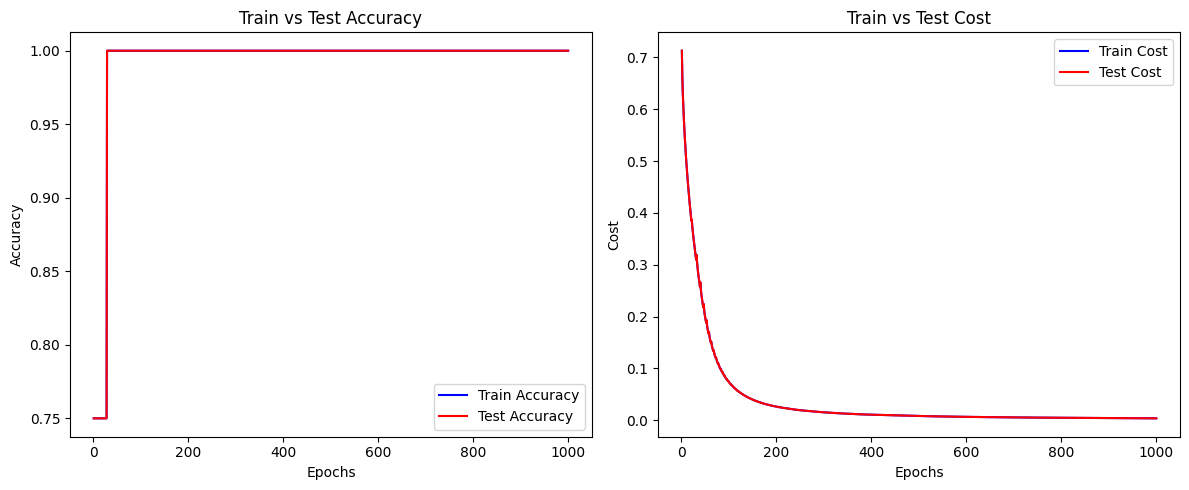

In [50]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_layer_neuron_counts, output_size):
        self.input_layer = input_layer(input_size)
        self.hidden_layers = [hidden_layer(hidden_layer_neuron_counts[0], self.input_layer)]
        
        for x in range(1, len(hidden_layer_neuron_counts)):
            self.hidden_layers.append(hidden_layer(hidden_layer_neuron_counts[x], self.hidden_layers[x-1]))
        
        self.output_layer = output_layer(output_size, self.hidden_layers[-1])
    
    def feed_forward(self, X):
        self.input_layer.input_values(X)
        prev_output = self.input_layer.forward_pass()
        
        for layer in self.hidden_layers:
            layer.input_values(prev_output)
            prev_output = layer.forward_pass()
        
        self.output_layer.input_values(prev_output)
        return self.output_layer.forward_pass()
    
    def backward_pass(self, target_vector):
        self.output_layer.compute_deltas(target_vector)
        
        for layer in reversed(self.hidden_layers):
            layer.compute_deltas()

    def update_weights(self, learning_rate):
        for layer in self.hidden_layers:
            for neuron in layer.list_of_neurons:
                neuron.w[1:] -= learning_rate * neuron.delta * neuron.X[1:]
                neuron.w[0] -= learning_rate * neuron.delta

        for neuron in self.output_layer.list_of_neurons:
            neuron.w[1:] -= learning_rate * neuron.delta * neuron.X[1:]
            neuron.w[0] -= learning_rate * neuron.delta

    def compute_accuracy(self, X, y):
        correct_predictions = 0
        for i in range(len(X)):
            output = self.feed_forward(X[i])
            predicted_class = np.argmax(output)
            actual_class = np.argmax(y[i])
            if predicted_class == actual_class:
                correct_predictions += 1
        return correct_predictions / len(X)

    def compute_cost(self, X, y):
        cost = 0
        for i in range(len(X)):
            output = self.feed_forward(X[i])
            cost -= np.log(output[np.argmax(y[i])])
        return cost / len(X)

    def train(self, X_train, y_train, X_test, y_test, epochs, learning_rate):
        train_accuracies = []
        test_accuracies = []
        train_costs = []
        test_costs = []

        for epoch in range(epochs):
            for i in range(len(X_train)):
                self.feed_forward(X_train[i])
                self.backward_pass(y_train[i])
                self.update_weights(learning_rate)

            # Track train/test accuracy and cost after each epoch
            train_accuracy = self.compute_accuracy(X_train, y_train)
            test_accuracy = self.compute_accuracy(X_test, y_test)
            train_cost = self.compute_cost(X_train, y_train)
            test_cost = self.compute_cost(X_test, y_test)

            train_accuracies.append(train_accuracy)
            test_accuracies.append(test_accuracy)
            train_costs.append(train_cost)
            test_costs.append(test_cost)

            print(f"Epoch {epoch + 1}/{epochs} - Train Acc: {train_accuracy:.4f}, Test Acc: {test_accuracy:.4f}, Train Cost: {train_cost:.4f}, Test Cost: {test_cost:.4f}")

        # Plot training and test accuracies and costs
        self.plot_metrics(train_accuracies, test_accuracies, train_costs, test_costs)

    def plot_metrics(self, train_accuracies, test_accuracies, train_costs, test_costs):
        epochs_range = range(1, len(train_accuracies) + 1)
        
        # Plot accuracies
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, train_accuracies, label='Train Accuracy', color='blue')
        plt.plot(epochs_range, test_accuracies, label='Test Accuracy', color='red')
        plt.title('Train vs Test Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot costs
        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, train_costs, label='Train Cost', color='blue')
        plt.plot(epochs_range, test_costs, label='Test Cost', color='red')
        plt.title('Train vs Test Cost')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Sample input data (XOR problem)
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0]])

# Test data (same as training data for XOR but in practice, it should be different)
X_test = X_train
y_test = y_train

# Create a neural network with 2 input neurons, 2 hidden neurons, and 4 output neurons
nn = NeuralNetwork(input_size=2, hidden_layer_neuron_counts=[2], output_size=4)

# Train the neural network and plot metrics
nn.train(X_train, y_train, X_test, y_test, epochs=1000, learning_rate=0.1)
